In [316]:
import pandas as pd

In [317]:
train = pd.read_csv("타이타닉 train.csv", index_col=["PassengerId"])
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [318]:
test = pd.read_csv("test.csv", index_col=["PassengerId"])
print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [319]:
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0


In [320]:
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0


In [321]:
train[pd.isnull(train["Fare"])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,,


In [322]:
test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,0.0


In [323]:
mean_fare = train["Fare"].mean()
mean_fare

32.2042079685746

In [324]:
test.loc[pd.isnull(test["Fare"]), "Fare"] = mean_fare

In [325]:
test[pd.isnull(test["Fare"])]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode
PassengerId,,,,,,,,,,,


In [326]:
train_embarked = pd.get_dummies(train["Embarked"], prefix="Embarked")
train_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1


In [327]:
test_embarked = pd.get_dummies(test["Embarked"], prefix="Embarked")
test_embarked.head()

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
892,0,1,0
893,0,0,1
894,0,1,0
895,0,0,1
896,0,0,1


In [328]:
train = pd.concat([train, train_embarked], axis=1)

In [329]:
test = pd.concat([test, test_embarked], axis=1)

In [330]:
full_data = [train, test]

In [331]:
for data in full_data:
    data["FamilySize"] = data["SibSp"] + data["Parch"] + 1  # 0인 사람을 고려

In [332]:
for data in full_data:
    data['Alone'] = 0
    data.loc[data['FamilySize'] == 1, 'Alone'] = 1

In [333]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Alone
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0,0,0,1,2,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,1,0,0,2,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,0,0,1,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0,0,1,2,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0,0,0,1,1,1


In [334]:
for data in full_data:
    data.loc[data['Fare']<= 8, 'Fare'] = 0
    data.loc[(data['Fare'] > 8) & (data['Fare'] <= 15), 'Fare'] = 1
    data.loc[(data['Fare'] > 15) & (data['Fare'] <= 30), 'Fare'] = 2
    data.loc[data['Fare'] > 30, 'Fare'] = 3
    data['Fare'] = data['Fare'].astype(int)

In [335]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Alone
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,NaN,S,0.0,0,0,1,2,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,3,C85,C,1.0,1,0,0,2,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0,NaN,S,1.0,0,0,1,1,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3,C123,S,1.0,0,0,1,2,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1,NaN,S,0.0,0,0,1,1,1


In [336]:
train['Has_Cabin'] = train["Cabin"].apply(lambda x: 0 if type(x) == float else 1)
test['Has_Cabin'] = test["Cabin"].apply(lambda x: 0 if type(x) == float else 1)

In [337]:
train.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encode,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Alone,Has_Cabin
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0,NaN,S,0.0,0,0,1,2,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,3,C85,C,1.0,1,0,0,2,0,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0,NaN,S,1.0,0,0,1,1,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3,C123,S,1.0,0,0,1,2,0,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1,NaN,S,0.0,0,0,1,1,1,0
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,1,NaN,Q,0.0,0,1,0,1,1,0
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,3,E46,S,0.0,0,0,1,1,1,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,2,NaN,S,0.0,0,0,1,5,0,0
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,1,NaN,S,1.0,0,0,1,3,0,0


In [338]:
import seaborn as sns

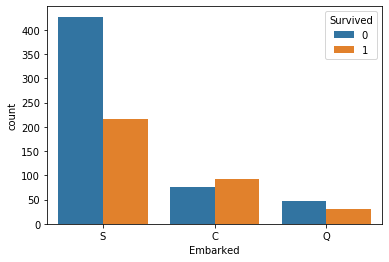

In [339]:
sns.countplot(data=train, x="Embarked", hue="Survived")

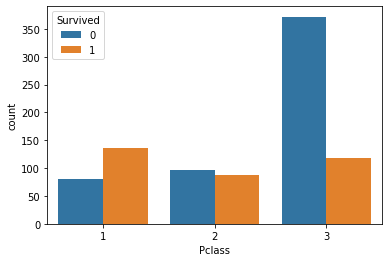

In [340]:
sns.countplot(data=train, x="Pclass", hue="Survived")

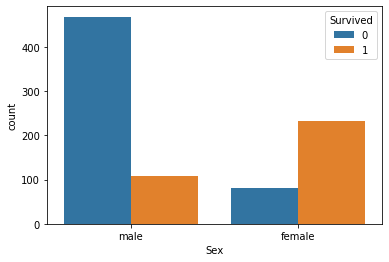

In [341]:
sns.countplot(data=train, x="Sex", hue="Survived")

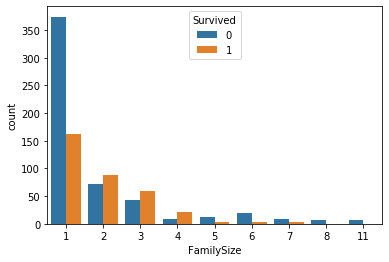

In [342]:
sns.countplot(data=train, x="FamilySize", hue="Survived")

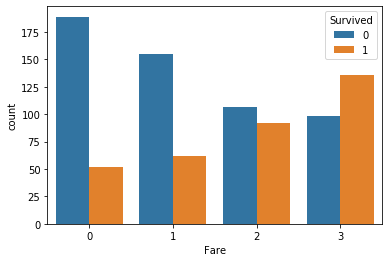

In [343]:
sns.countplot(data=train, x="Fare", hue="Survived")

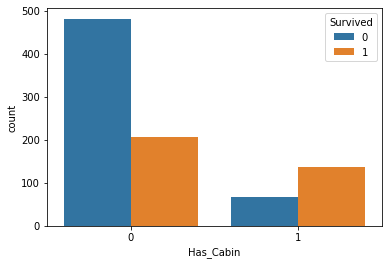

In [344]:
sns.countplot(data=train, x="Has_Cabin", hue="Survived")

In [345]:
train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Sex_encode', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'FamilySize', 'Alone', 'Has_Cabin'],
      dtype='object')

In [346]:
test.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Sex_encode', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'FamilySize', 'Alone', 'Has_Cabin'],
      dtype='object')

In [347]:
drop_elements = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Sex', 'Embarked','Age']

In [348]:
train = train.drop(drop_elements, axis=1)
test = test.drop(drop_elements, axis=1)

In [349]:
train

,Survived,Pclass,Fare,Sex_encode,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Alone,Has_Cabin
PassengerId,,,,,,,,,,
1,0,3,0,0.0,0,0,1,2,0,0
2,1,1,3,1.0,1,0,0,2,0,1
3,1,3,0,1.0,0,0,1,1,1,0
4,1,1,3,1.0,0,0,1,2,0,1
5,0,3,1,0.0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...
887,0,2,1,0.0,0,0,1,1,1,0
888,1,1,2,1.0,0,0,1,1,1,1
889,0,3,2,1.0,0,0,1,4,0,0


In [350]:
test

,Pclass,Fare,Sex_encode,Embarked_C,Embarked_Q,Embarked_S,FamilySize,Alone,Has_Cabin
PassengerId,,,,,,,,,
892,3,0,0.0,0,1,0,1,1,0
893,3,0,1.0,0,0,1,2,0,0
894,2,1,0.0,0,1,0,1,1,0
895,3,1,0.0,0,0,1,1,1,0
896,3,1,1.0,0,0,1,3,0,0
...,...,...,...,...,...,...,...,...,...
1305,3,1,0.0,0,0,1,1,1,0
1306,1,3,1.0,1,0,0,1,1,1
1307,3,0,0.0,0,0,1,1,1,0


In [351]:
submission = pd.read_csv("Titanic Submission.csv", index_col = "PassengerId")
submission

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0
...,...
1305,0
1306,1
1307,0


In [352]:
from sklearn.tree import DecisionTreeClassifier

In [353]:
y_train = train["Survived"]

In [354]:
x_train = train.drop("Survived", axis=1)

In [355]:
model = DecisionTreeClassifier(max_depth=5)

In [356]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [357]:
predict = model.predict(test)

In [358]:
predict

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [359]:
y_test = submission["Survived"]

In [360]:
print("Test set score: {:.2f}".format(np.mean(predict==y_test)))

Test set score: 0.93


In [361]:
print("Test set score: {:.2f}".format(model.score(test,y_test)))

Test set score: 0.93


In [362]:
print("특성 중요도:\n{}".format(model.feature_importances_))

특성 중요도:
[0.18421792 0.03882281 0.60151129 0.00646192 0.         0.01429367
 0.08653742 0.         0.06815498]


In [363]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [367]:
y_train = train["Survived"]

In [368]:
x_train = train.drop("Survived", axis=1)

In [369]:
model2 = knn.fit(x_train, y_train)

In [294]:
predict2 = model2.predict(test)

In [370]:
predict2

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,

In [371]:
print("Test set score: {:.2f}".format(np.mean(predict2==y_test)))

Test set score: 0.78


In [372]:
print("Test set score: {:.2f}".format(model2.score(test,y_test)))

Test set score: 0.78


In [305]:
from sklearn.ensemble import RandomForestClassifier

In [306]:
y_train = train["Survived"]

In [307]:
train = train.drop("Survived", axis=1)

In [308]:
model3 = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)

In [309]:
model3.fit(train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [310]:
predict3 = model3.predict(test)

In [311]:
predict3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [312]:
print("Test set score: {:.2f}".format(np.mean(predict3==y_test)))

Test set score: 1.00


In [313]:
print("Test set score: {:.2f}".format(model3.score(test,y_test)))

Test set score: 1.00
